In [1]:
%matplotlib inline
import numpy as np  # this is numpy
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
def dataloader(N, verbose=False):
    '''
    Function  to create 2N binary data

    inputs
    -------
    N: int

    output
    -------
    data: [2N, 2]
    labels: [2N]
    '''
    pdf1 = np.random.multivariate_normal([1, -0.8], np.eye(2), size=N)
    class1 = np.zeros(N, 'int')

    pdf2 = np.random.multivariate_normal([-0.8, 1], np.eye(2), size=N)
    class2 = np.ones(N)

    if verbose:
        # ---  scatter plot of the data
        fig, ax = plt.subplots()
        kw = dict(marker='o', alpha=0.5, edgecolors='k')
        ax.scatter(pdf1[:, 0], pdf1[:, 1], color='royalblue', **kw)
        ax.scatter(pdf2[:, 0], pdf2[:, 1], color='orange', **kw)
        plt.show()
        plt.close()

    data = np.row_stack([pdf1, pdf2])
    labels = np.concatenate([class1, class2])

    dataset = np.column_stack([data, labels])
    df = pd.DataFrame(dataset, columns=['x1', 'x2', 'class'])
    #df.shuffle(inplace=True)
    return df

In [23]:
class LinearRegression(object):
    def __init__(self, verbose=False):
        self.verbose = verbose

    def fit(self, X, Y):
        intersect = np.ones(X.shape[0])
        X = np.column_stack([intersect, X])
        XX = X.T.dot(X)
        invXX = np.linalg.inv(XX)
        self.Beta = invXX.dot(X.T.dot(Y))

        if self.verbose:
            print(f'{self.Beta} with RSS: {self._rss(X, Y):.2f}')
            self._plot(X, Y)

    def predict(self, X):
        return X.T.dot(self.Beta)

    def _rss(self, X, Y):
        return ((Y - X.dot(self.Beta))**2).sum()

    def _plot(self, X, Y):
        kws = dict(marker='o', alpha=0.5, edgecolors='k')
        fig, ax = plt.subplots()
        print(X.shape)


        ax.scatter(X[:, 1], X[:, 2], c=Y, **kws)
        # xT beta = 0.5
        # [1, x1, x2] * [b0, b1, b2] = 0.5
        # b0 + x1 * b1 + x2 * b2 = 0.5
        # x2 = (0.5 - x1*b1 - b0)/b2
        xrange = np.linspace(X[:,1].min(), X[:, 1].max())
        
        X2hat = (0.5 - xrange*self.Beta[1] - self.Beta[0])/self.Beta[2]
        ax.plot(xrange, X2hat)
        ax.fill_between(xrange, X2hat, 4, color='yellow', alpha=0.2, zorder=-1)
        ax.fill_between(xrange, -5, X2hat, color='purple', alpha=0.2, zorder=-1)

        plt.show()
        plt.close()

In [5]:
df = dataloader(300)

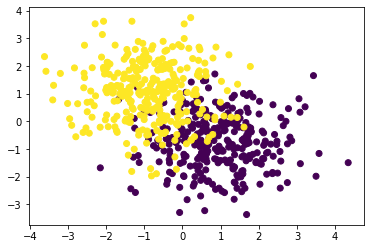

In [7]:
plt.scatter(df['x1'], df['x2'], c=df['class'])

In [8]:
x = df[['x1', 'x2']].values
y = df['class'].values
x.shape, y.shape

((600, 2), (600,))

Let's add the bias feature to x

In [10]:
x = np.column_stack([np.ones(x.shape[0]), x])
x.shape

(600, 3)

In [96]:
from time import time

In [109]:
class LinearRegression:
    '''
        Linear Regression with PyTorch
        
        
        Algorithm
        -----------
        thetas = (X^t.X)^-1.(X.Y)
        
        see e.g.,
        https://pytorch.org/docs/master/torch.html#torch.inverse
        https://pytorch.org/docs/master/nn.html#torch.nn.MSELoss
    
    '''
     
    def __init__(self, reduction='sum'):
        self.cost = torch.nn.MSELoss(reduction=reduction)
        
    def fit(self, x, y, verbose=False):

        # check input
        if isinstance(x, np.ndarray):
            x = torch.from_numpy(x)
        if isinstance(y, np.ndarray):
            y = torch.from_numpy(y)
            
        # thetas = (X^t.X)^-1.(X.Y)
        t0 = time()        
        xx = torch.matmul(x.T, x)
        xx_inv = torch.inverse(xx)
        self.coef_ = torch.matmul(xx_inv, torch.matmul(x.T, y))        
        t1 = time()        
        
        if verbose:
            cost_ = self.cost(y, self.predict(x))
            print(f'Parameters: {self.coef_}'\
                  f' cost: {cost_:.3f} in {t1-t0:.3f} sec')
        
    def predict(self, x):
        return torch.matmul(self.coef_, x.T)

In [12]:
import torch

In [111]:
LR = LinearRegression()

In [122]:
LR.__name__

AttributeError: 'LinearRegression' object has no attribute '__name__'

In [112]:
LR.fit(x, y, verbose=True)

Parameters: tensor([ 0.4775, -0.1756,  0.1596], dtype=torch.float64) cost: 59.242 in 0.001 sec


[ 0.4775012  -0.17558613  0.15959955] with RSS: 59.24
(600, 3)


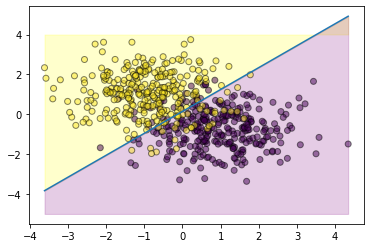

In [24]:
LR = LinearRegression(verbose=True)
LR.fit(df.loc[:, ['x1', 'x2']].values, df['class'].values)

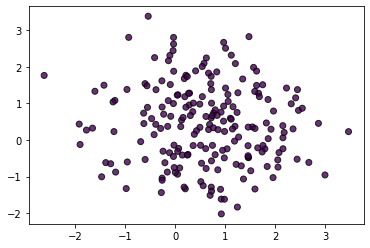

In [43]:
fig, ax = plt.subplots()

kw = dict(marker='o', alpha=0.8, edgecolors='k')
ax.scatter(*pdf1.T, c=np.ones(100), **kw)
ax.scatter(*pdf2.T, c=np.zeros(100), **kw)